<center>
<h1>Boston Housing Prediction - Regression Task</h1>
</center>


## Objective

The goal of this project is to develop a machine learning model to predict house prices in Boston. Using features like square footage, number of rooms, and crime rate, the model will estimate the price of a property.

This kind of prediction is useful for anyone involved in real estate whether it’s potential buyers estimating property values or real estate agents advising clients on pricing.


#### Why this matters:

Imagine you're a potential buyer looking for your first home. You want to know if the price of a property is reasonable for the area. Our model will help make that prediction faster and more reliably, using historical data about housing prices and various neighborhood features.

## Dataset

We are using the Boston Housing Dataset to predict house prices. This dataset was collected in 1976 and has 506 entries with 14 features about homes in the Boston area, and each row represents one property. 

Boston Housing Dataset Attribute Informatopn:


- crim: crime rate by town. 

- zn: Proportion of residential land zoned for large lots. 

- indus: Proportion of non-retail business acres per town. 

- chas: Charles River dummy variable. 

- nox: Nitrogen oxides concentration. 

- rm: Average number of rooms per dwelling. 

- age: Proportion of owner-occupied units built before 1940.

- dis: Weighted distance to employment centers.

- rad: Index of accessibility to radial highways.

- tax: Property tax rate per $10,000. 

- ptratio: Pupil-teacher ratio.

- b: Proportion of residents of African American descent.

- lstat: Percentage of the population with lower status.

- medv: Median value of owner-occupied homes in $1000s.


## Import necessary libraries and overview of dataset

Before we start analyzing the data, we need to import a few libraries that will help us process, analyze, and visualize the data.

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#import statsmodels.api as sm  # Importing statsmodels
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV




## Loading the data
Loading the data is the first step in understanding what we're working with. By inspecting the first few rows, we can identify the types of data we’re dealing with (e.g., numeric, categorical) and whether there are any immediate issues, such as missing or unusual values.

In [205]:
#read dataset
data = pd.read_csv("../datasets/Boston.csv")  # Read the dataset

Boston_data = data.copy()
# Display the first lines of boston dataset
Boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Exploratory Data Analysis and Data Preprocessing

Exploratory Data Analysis  is composed of:

Univariate Analysis
Bivariate Analysis and 
Multivariate Analysis


###  Univariate Analysis

In Univariate Analysis, we look at each feature individually to understand its distribution, outliers, and summary statistics.



#### 1. Describe the Dataset

We started by getting shape and a summarystatistics of the Boston dataset which will give us key metrics like mean, standard deviation, min, and max for each numeric column.

In [206]:
Boston_data.shape 

(506, 14)

In [207]:
# Statistical Information

Boston_data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Based on summay statistsic This dataset contains various variables related to neighborhoods or areas, with statistical measures including the **mean**, **standard deviation**, **minimum**, **maximum**, and **percentiles**. Below is an interpretation of the key variables:

- The crime rate varies widely across neighborhoods, with some areas experiencing very low crime while others have a significantly higher crime rate.
- There is considerable variation in land zoning for large lots. Some areas have no land zoned for large lots, while others have a significant portion of land designated for this purpose.
- The proportion of land used for non-retail business is varied, suggesting a mix of areas with small and large industrial sectors.
- 'chas' is a binary variable indicating proximity to the Charles River. Most areas are not near the river, as reflected by the low mean.\
- The nitrogen oxides concentration is fairly consistent across neighborhoods, with values ranging from 0.385 to 0.87.
- On average, homes in this dataset are valued around $22,530. However, some neighborhoods have home values as high as $50,000, showing a considerable spread in the data.


#### General Trends:
- **Skewed Distributions**: Variables like crime rate, land zoning, and industrial area proportions appear to have skewed distributions, with some extreme values (outliers) pulling the mean away from the median.
- **Moderate Spread**: Variables like nitrogen oxides concentration and home values have more moderate variation, indicating a more consistent distribution of values across neighborhoods.

This dataset gives a snapshot of neighborhood characteristics, showing variability in aspects like crime, land use, industrial activity, and home values.

#### 2. Check for Missing Values  -Preprocessing The dataset

We check if any missing values are present

### Checking the information of data

In [208]:
info_df = pd.DataFrame({
    'Data Type': Boston_data.dtypes,
    'Non-Null Count': Boston_data.notnull().sum(),
    'Unique Value Count': Boston_data.nunique()
})

info_df

,Data Type,Non-Null Count,Unique Value Count
crim,float64,506,504
zn,float64,506,26
indus,float64,506,76
chas,int64,506,2
nox,float64,506,81
rm,float64,506,446
age,float64,506,356
dis,float64,506,412
rad,int64,506,9
tax,int64,506,66


The dataset contain 11 columns which has decimal values and 3 columns which are integer. And the output shows that there is no missing entries since the total number of observation is 506 means that data is clean in terms of missing information.

conserning the columns crim, nox, rm, age, and lstat show high variability, with a large number of unique values, chas and rad have low unique value counts, indicating they are likely categorical or binary in nature.

#### 3. Plot Histograms for Numerical Features

In order To visualize the distribution of each numeric feature, we’ll plot histograms.

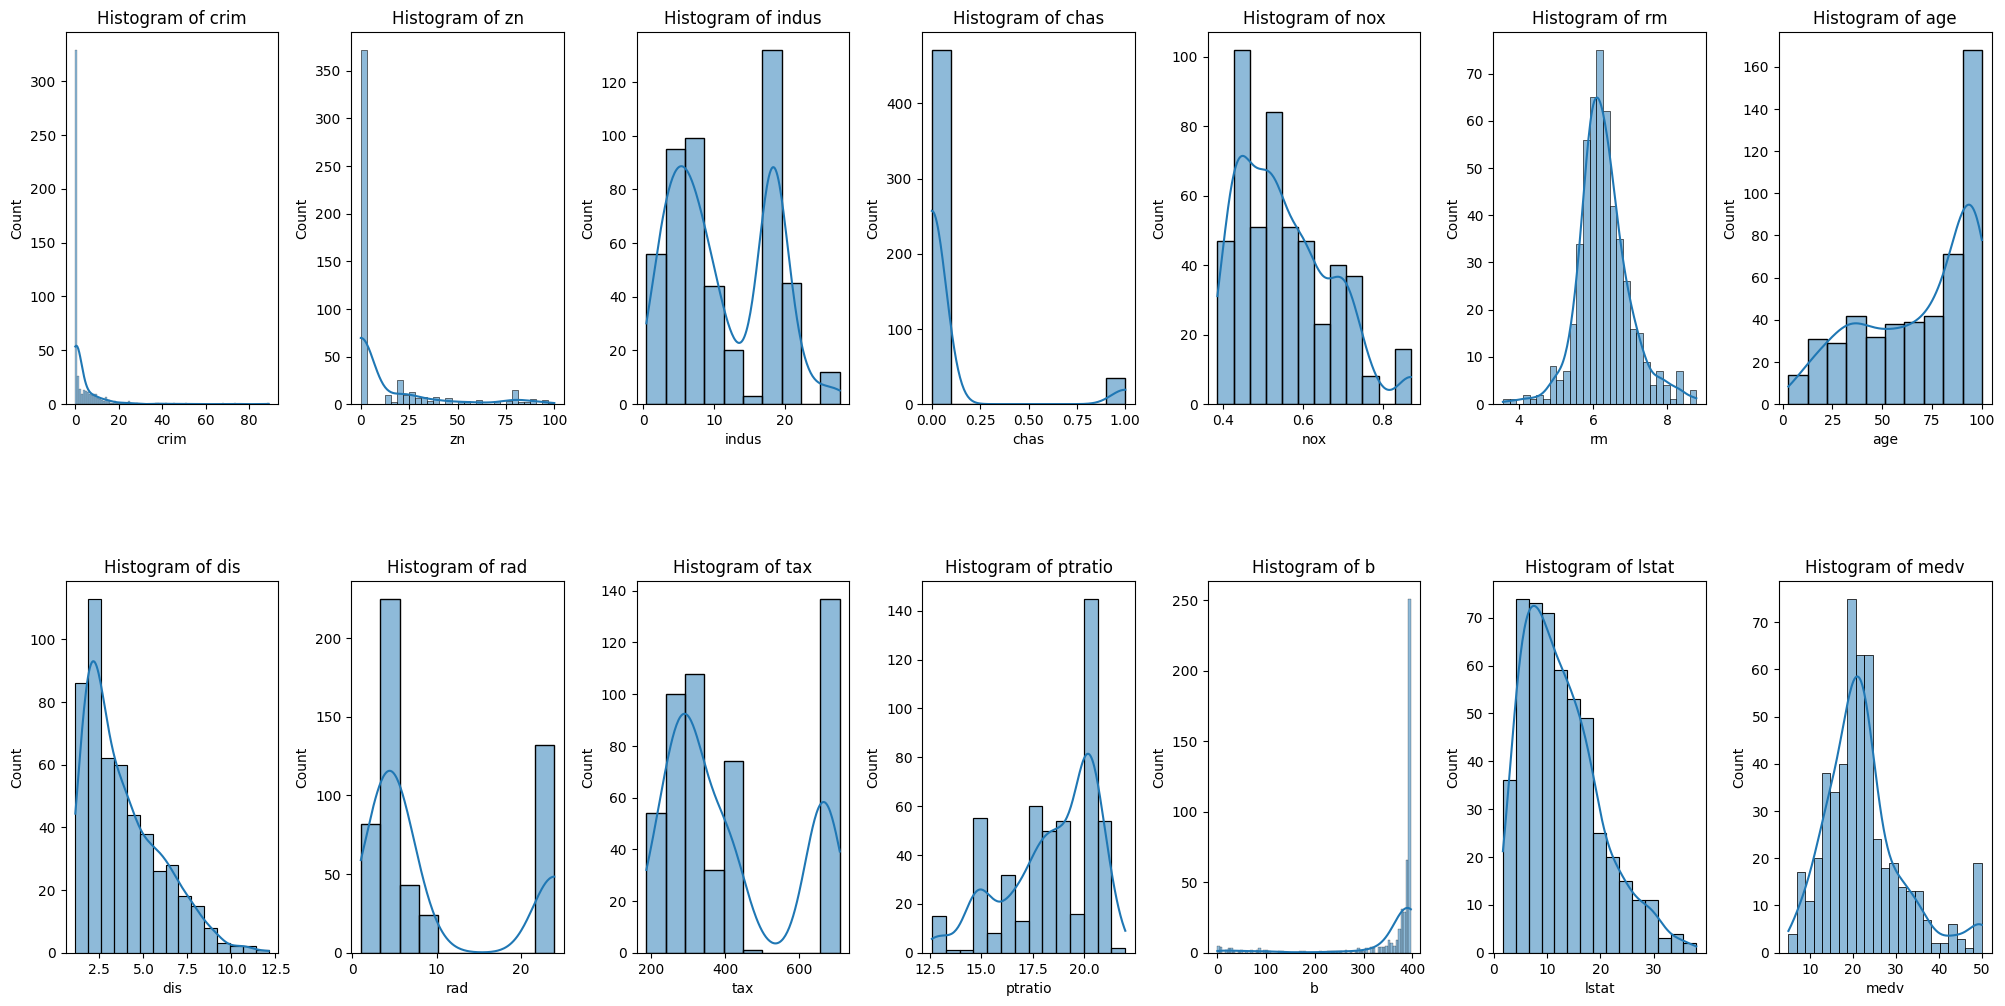

In [209]:
# Plot histograms for all columns

# Create subplots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()  # Flatten the array of axes for easy indexing

# Loop through each column and create a histogram
for index, col in enumerate(Boston_data.columns):
    sns.histplot(data=Boston_data, x=col, ax=ax[index], kde=True)  # Add kde=True for density curve
    ax[index].set_title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout(pad=0.5, w_pad=0.9, h_pad=8.0)
plt.show()



The histogram shows that the values of 'crime' columns are mostly concentreted in left side which make it left skewed
the value of 'block' are mostly concentreted in the right side whivh make the column right skewed. 
the value of 'room' column they are  they are somehow normally distributed.
our target 'medv' column are slightlt normalyy distributed and most of values are concentreted in the range of 0 and 40.

Boxplots for all numeric columns in the dataset. we will use them to identifty the outliers in our boston Dataset.

#### Observation on Boxplot

- 'crim', 'zn', 'b', 'rm' has many outliers

- like three values have so many outliers , means it don't follow normal distribution so, we need to make them as uniform distribution by converting those values into log transformation or min max normalization to minimize outliers.

- we won't ignore those outlier be couse we can loose some data.



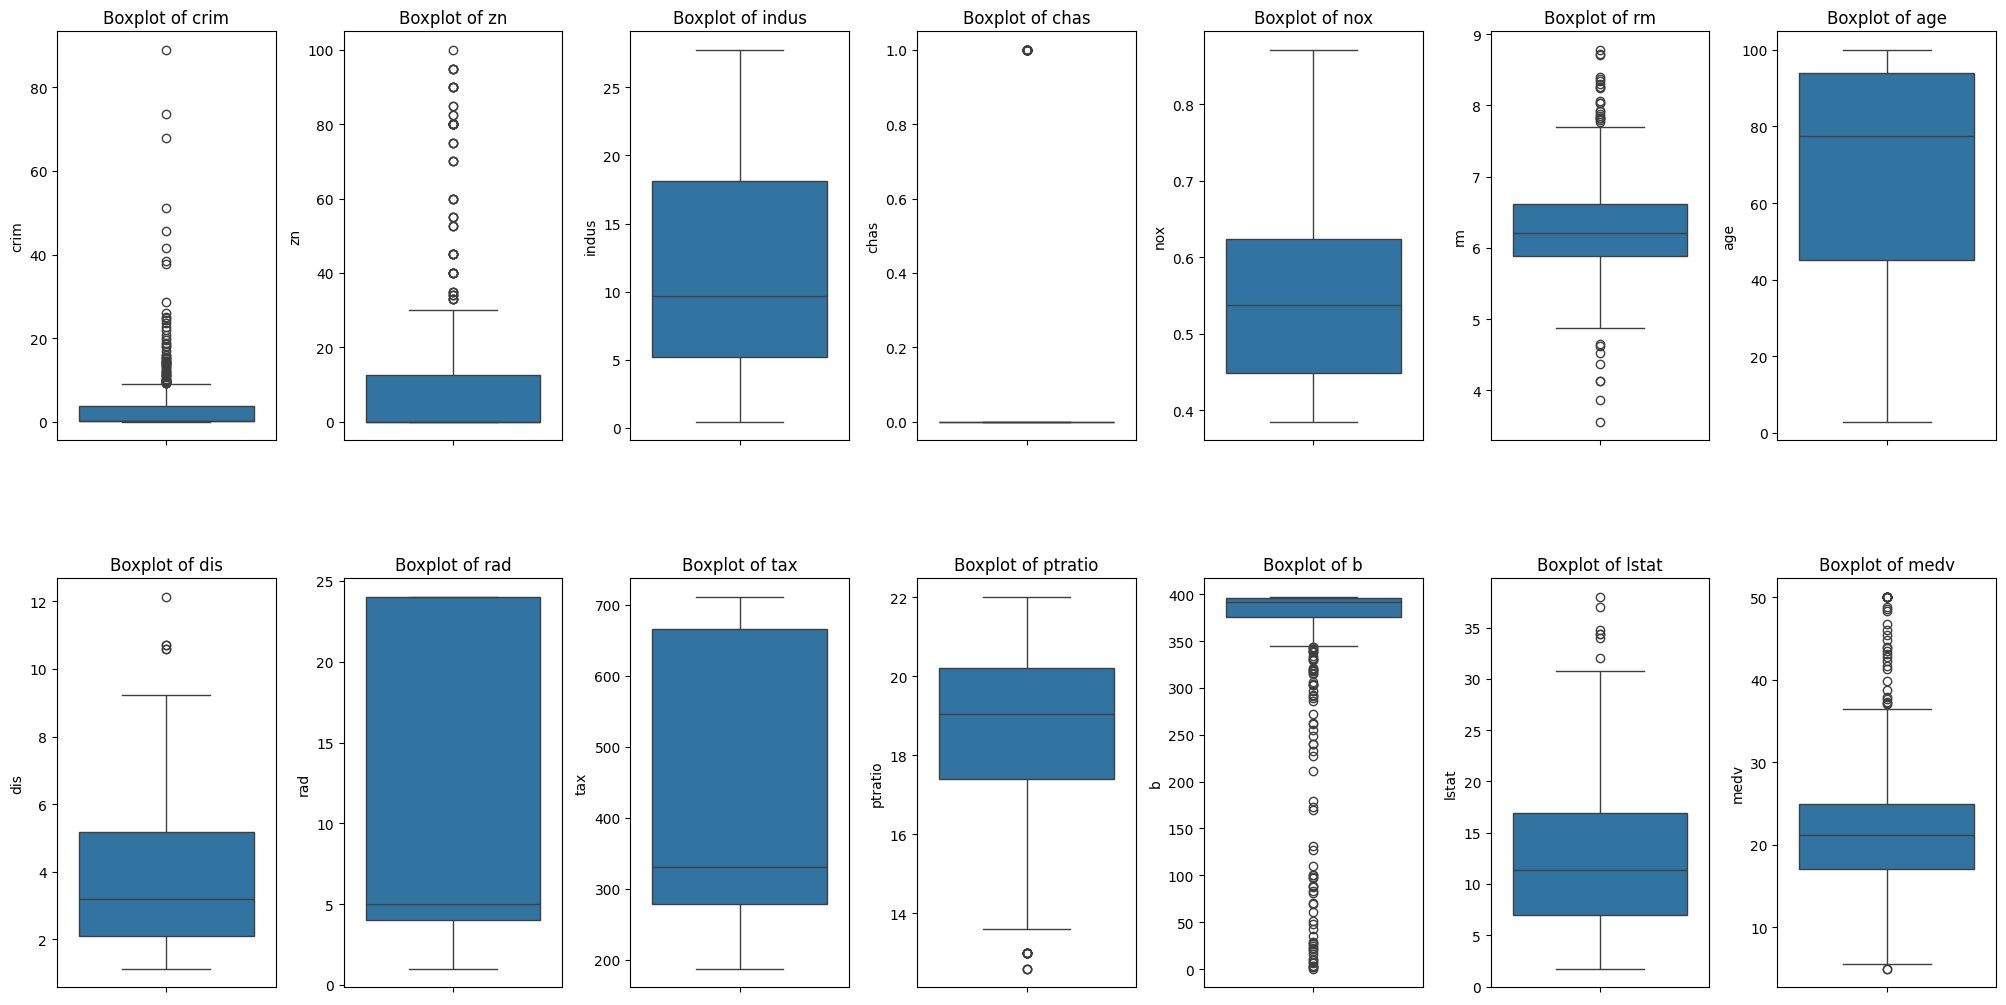

In [210]:
# Create subplots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()  # Flatten the array of axes for easy indexing

# Loop through each column and create a boxplot
for index, (col, values) in enumerate(Boston_data.items()):
    sns.boxplot(y=col, data=Boston_data, ax=ax[index])
    ax[index].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout(pad  = 0.5, w_pad = 0.9, h_pad = 8.0)
plt.show()


##### Observation on Boxplot Analysis.

For "Crim(Crime rate by town)" the distribution is highly skewed to the right, it indicate that most towns have a low crime rate, but there are a few towns with significantly high crime rates.
There are several outlier with very high crime rates, which can affect the model's performance if not handled properly.
###### We Might need to apply a logarithmic transformation to reduce theskewness.

For "zn (Proportion of residential land zoned for large lots)" The median value is close to zero, it indicating that most towns have very little or no large-lot zoning. There are several towns with high proportions of large-lot zoning, which appear as outliers.

###### This feature is highly imbalanced, and many towns have no large-lot zoning. It may need normalization.

For " indus (Proportion of non-retail business acres per town) " The values are fairly spread out, with the median leaning toward the lower end. There are a few outliers with significantly high industrial land use.

##### Industrial land use varies between towns but is generally low.

For " chas (Charles River dummy variable) " This is a binary variable with values of either 0 or 1. Most towns do not have properties bordering the Charles River (0), with a few towns bordering the river (1). No significant outliers are present because this is a binary feature.

#### This variable indicates whether a town is near the Charles River, which could affect property values.


For " nox (Nitrogen oxides concentration) " The distribution appears fairly compact with a few outliers on the higher side. There are some outliers with high NOx concentration, indicating poorer air quality in certain towns.

##### Air quality can be an important factor affecting house prices.


For "  rm (Average number of rooms per dwelling) " The distribution is relatively normal, with most properties having between 5 and 7 rooms. There are a few properties with more than 8 rooms, which are outliers.

##### The number of rooms is an important predictor of house prices. Properties with many rooms are likely more expensive.


For  " age (Proportion of owner-occupied units built before 1940) " The distribution shows that many towns have older properties, with a median value close to 70%. No significant outliers are visible.

##### Older properties may require more maintenance and could influence house prices.

For  " dis (Weighted distance to employment centers)" The distribution is right-skewed, indicating that most properties are closer to employment centers. There are some outliers representing properties far from employment centers.

##### Proximity to employment centers can affect property prices.


For " rad (Index of accessibility to radial highways) " This variable has a broad range, with a median value around 9. No significant outliers are visible.

##### Accessibility to highways can affect property demand.


For " tax (Property tax rate per $10,000)" The values are spread out, with no significant clusters. No significant outliers are visible. 

##### Higher property taxes could negatively affect house prices.

For " ptratio (Pupil-teacher ratio) " The distribution is relatively narrow, with most values falling between 15 and 20. There are a few outliers with low pupil-teacher ratios.

##### A lower pupil-teacher ratio can positively affect property prices, as it indicates better education quality.


For "  b (Proportion of African American residents) " The values are relatively high, with the majority of towns having a high proportion of African American residents. There are some towns with lower proportions, which appear as outliers.

##### This feature may need further interpretation to understand its impact on house prices.


For "  lstat (Percentage of the population with lower status) "  The distribution shows that most towns have a lower percentage of low-status residents, with a few towns having significantly higher values. There are several outliers with very high percentages of low-status residents.

##### This feature is an important predictor of house prices. Towns with higher percentages of low-status residents tend to have lower property values.


For " medv (Median value of owner-occupied homes in $1000s) The median house price is around $21,000, with values ranging from $5,000 to $50,000. There are several outliers with extremely high or low property values. This is the target variable for prediction. Handling outliers properly will help improve model accuracy.





Diskplots for all numeric columns in the dataset. we will use them to identifty the outliers in our boston Dataset.

#### Observation on diskplot

- all the values of 'crim and 'zn' are right skewed

- 'we are having uniform distribution in our target.

- 'rm' is completely uniform distribution
- 'lstat' is somehow uniform distribution
-'age' of the building  is right skewed
- 'dis' left skewed
-'b'  complete right skewed


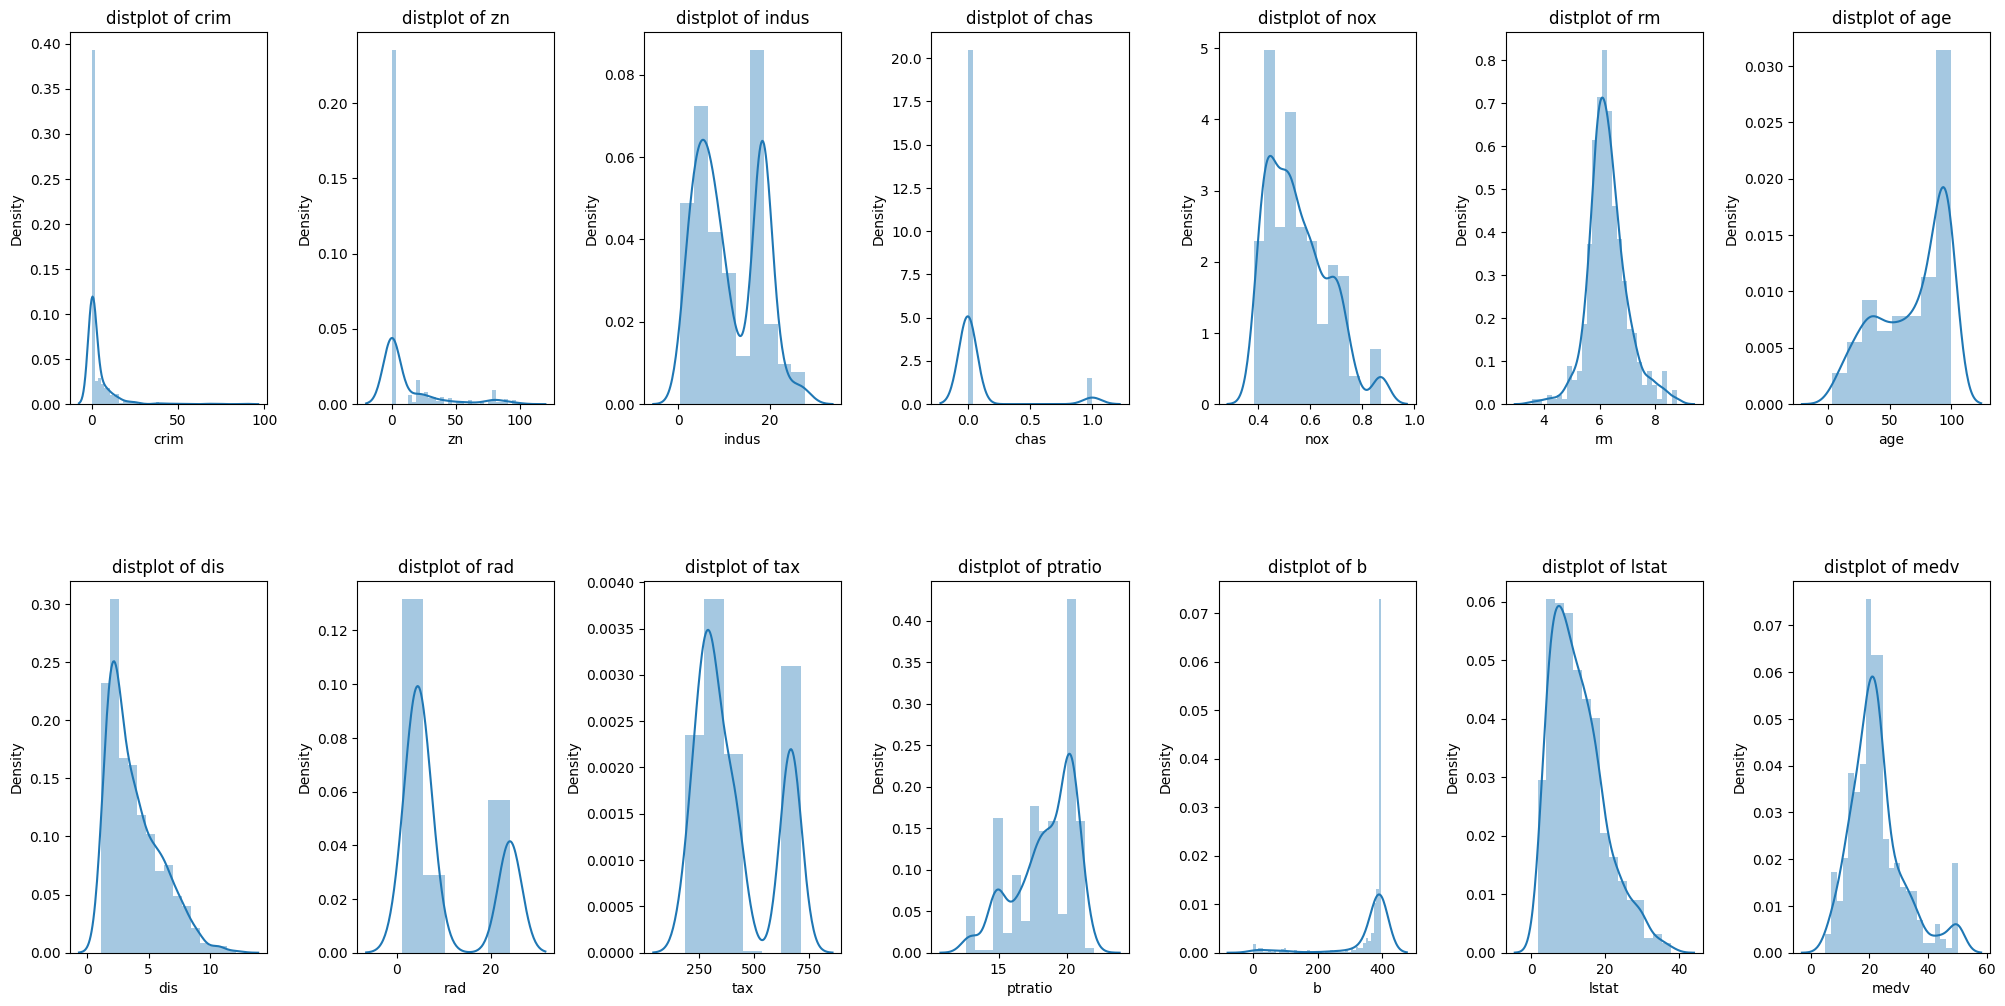

In [211]:
# Create subplots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()  # Flatten the array of axes for easy indexing

# Loop through each column and create a boxplot
for index, (col, values) in enumerate(Boston_data.items()):
    sns.distplot(values, ax=ax[index])
    ax[index].set_title(f'distplot of {col}')

# Adjust layout
plt.tight_layout(pad  = 0.5, w_pad = 0.9, h_pad = 8.0)
plt.show()


#### Min Max Normalization

we are going to make all the values in the range of 0 and 1.
previousl all the values were in the higher range but now all the values are in the range of 0 to 1. we used min max normalization to avoid having bigger difference in the values.


In [212]:
cols = ['crim', 'zn', 'tax', 'b']
for col in cols:
    minimum = min (Boston_data[col])
    maximun = max (Boston_data[col])
    Boston_data[col] = (Boston_data[col]- minimum)/(maximun-minimum)

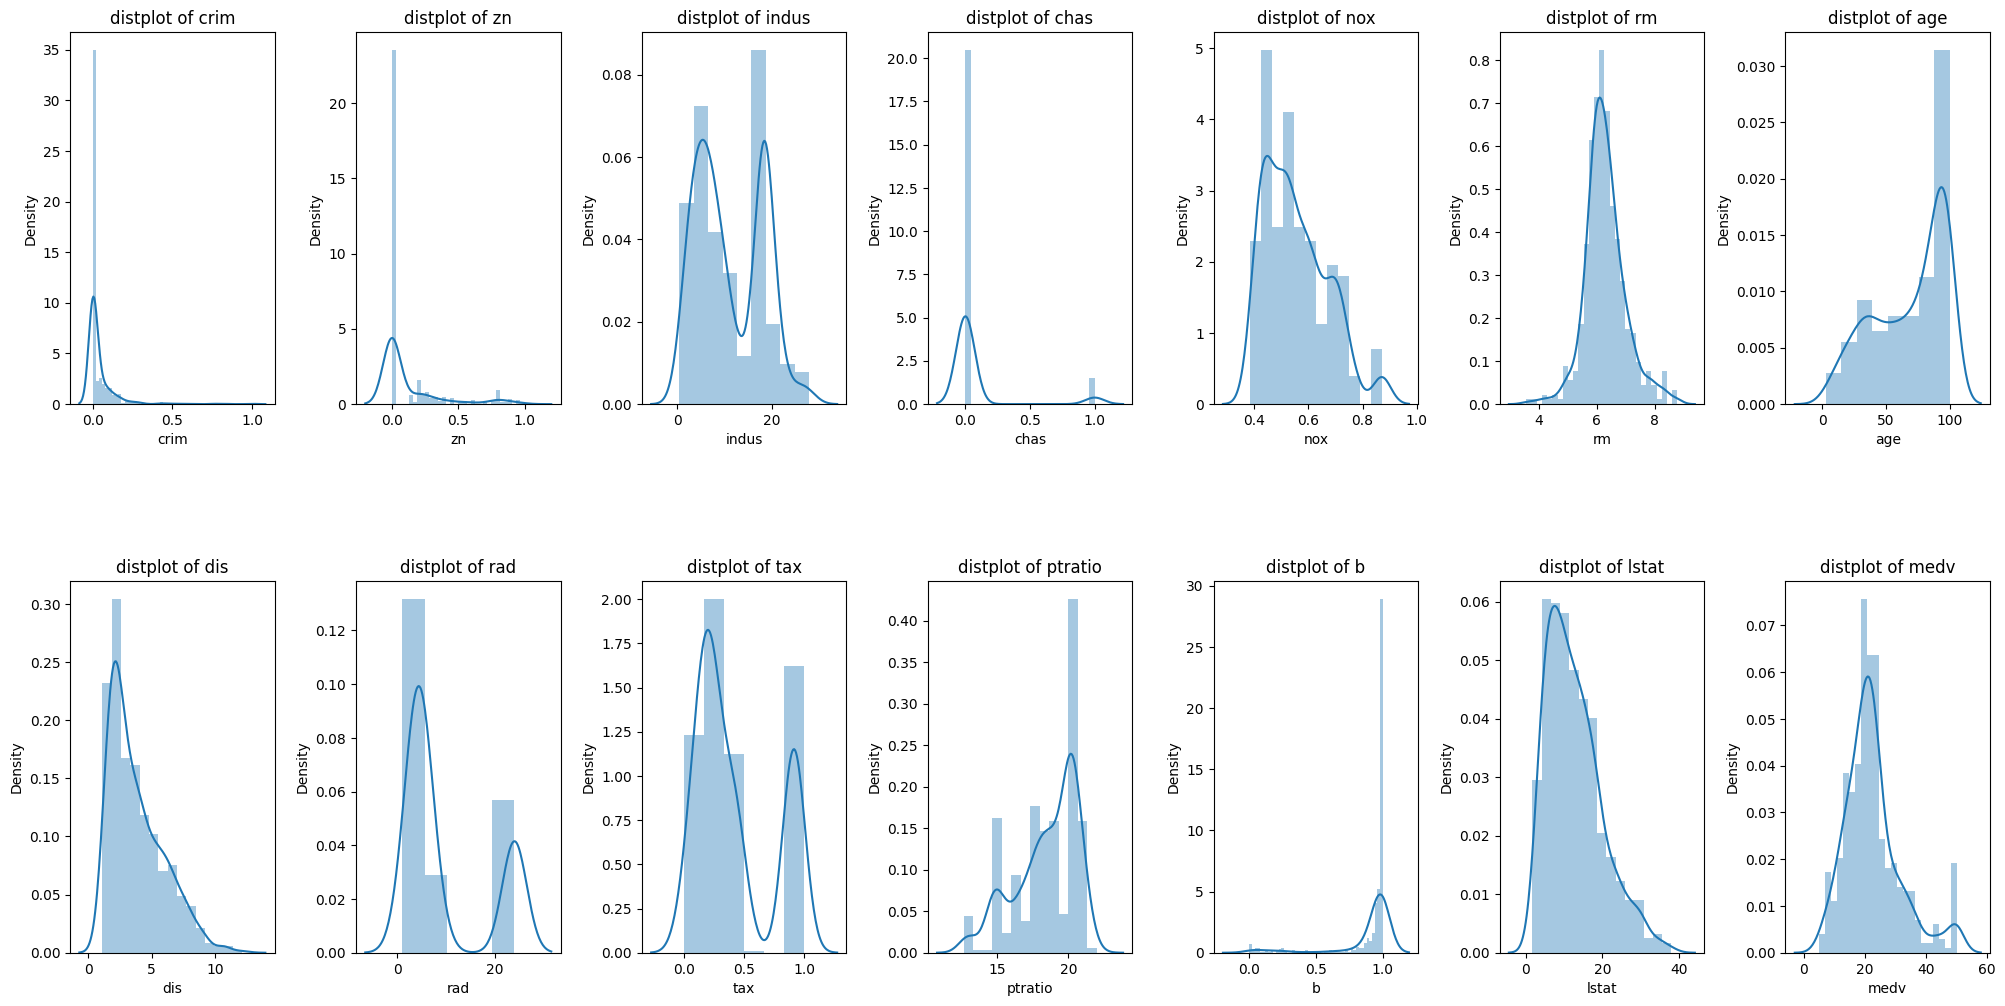

In [213]:
# Create subplots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()  # Flatten the array of axes for easy indexing

# Loop through each column and create a boxplot
for index, (col, values) in enumerate(Boston_data.items()):
    sns.distplot(values, ax=ax[index])
    ax[index].set_title(f'distplot of {col}')

# Adjust layout
plt.tight_layout(pad  = 0.5, w_pad = 0.9, h_pad = 8.0)
plt.show()

#### Standardization

we need to do standardization to have uniform  distribution. it use mean and standard deviation to create a standard score.

In [214]:
#standardization
scalar = preprocessing.StandardScaler()

#fit our data
scaled_cols = scalar.fit_transform(Boston_data[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns =cols)
scaled_cols.head()


,crim,zn,tax,b
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [215]:
### we need now our orginal dataframe
for col in cols:
    Boston_data[cols] = scaled_cols[cols]


In [216]:
Boston_data[cols]

,crim,zn,tax,b
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052
...,...,...,...,...
501,-0.413229,-0.487722,-0.803212,0.387217
502,-0.415249,-0.487722,-0.803212,0.441052
503,-0.413447,-0.487722,-0.803212,0.441052
504,-0.407764,-0.487722,-0.803212,0.403225


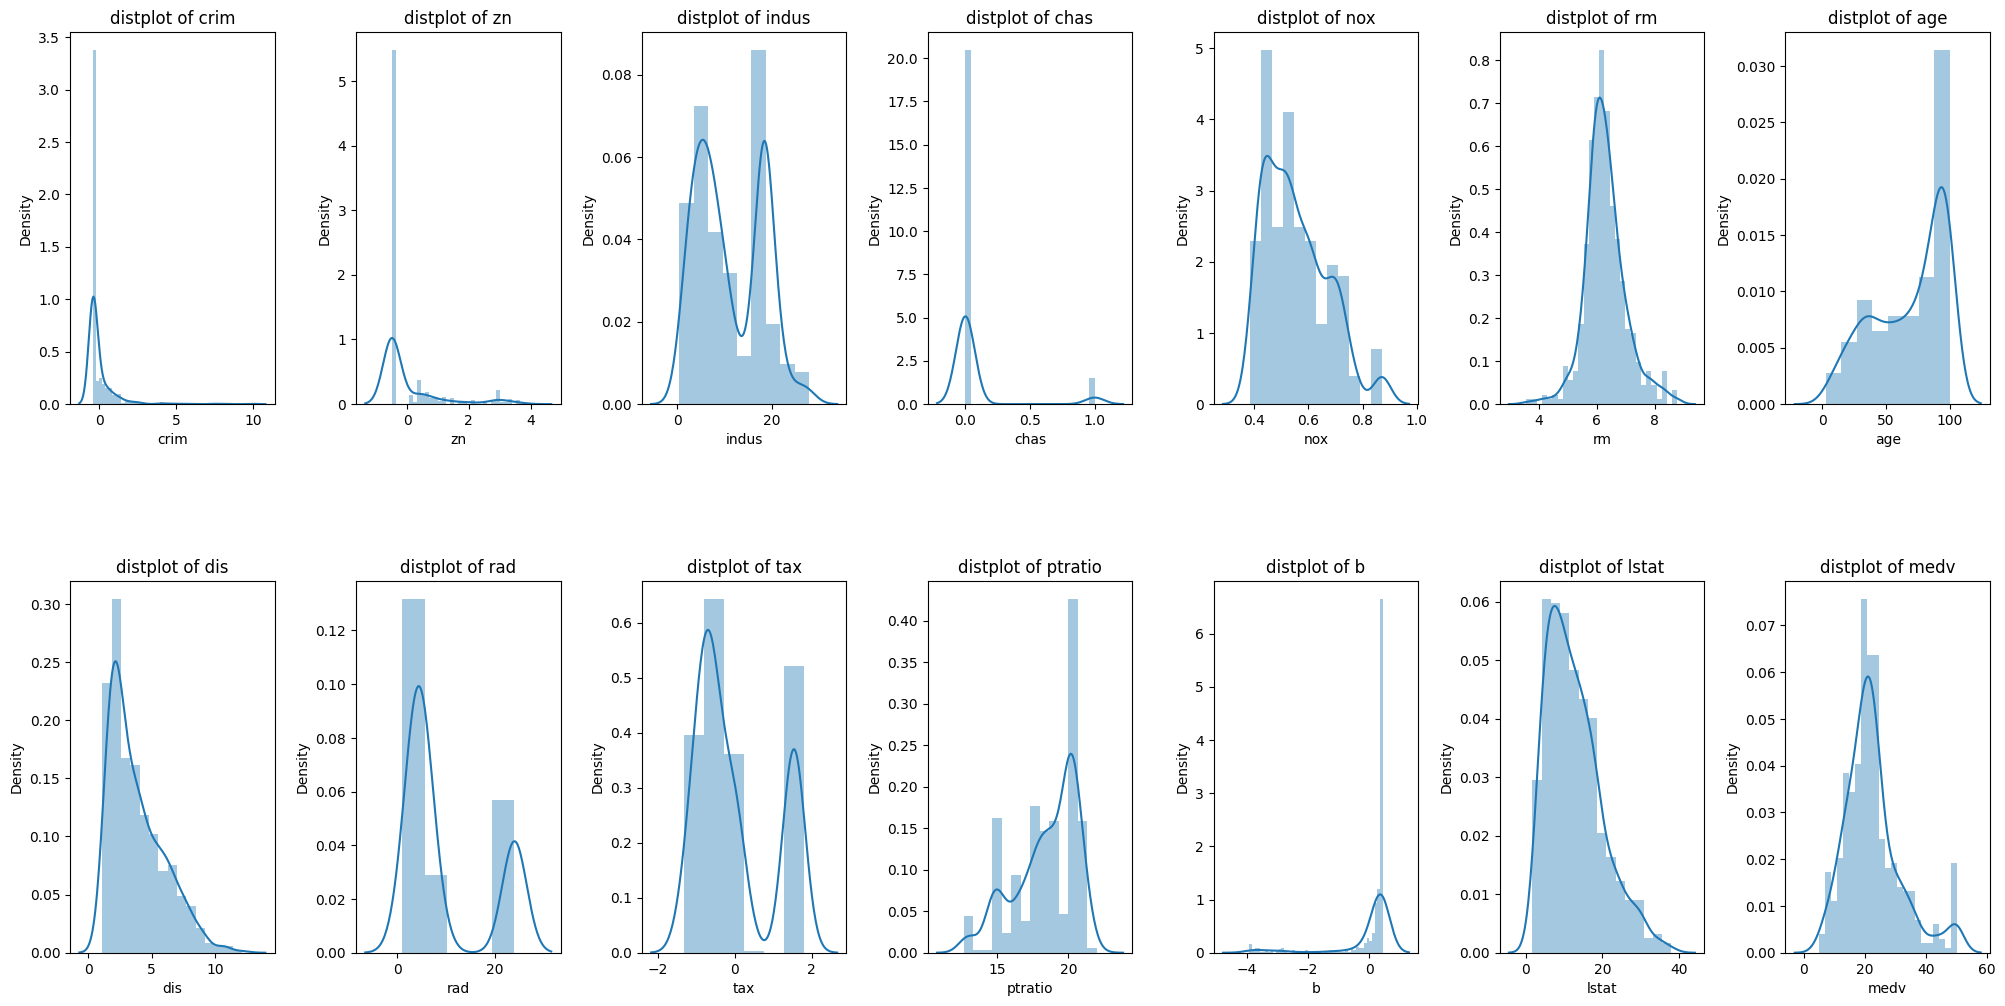

In [217]:
# Create subplots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()  # Flatten the array of axes for easy indexing

# Loop through each column and create a boxplot
for index, (col, values) in enumerate(Boston_data.items()):
    sns.distplot(values, ax=ax[index])
    ax[index].set_title(f'distplot of {col}')

# Adjust layout
plt.tight_layout(pad  = 0.5, w_pad = 0.9, h_pad = 8.0)
plt.show()

### Bivariate Analysis

In Bivariate Analysis, we examine the relationship between the target variable (medv) and each feature.

#### 1. Correlation Heatmap

A heatmap helps us visualize correlations between features and the target variable.

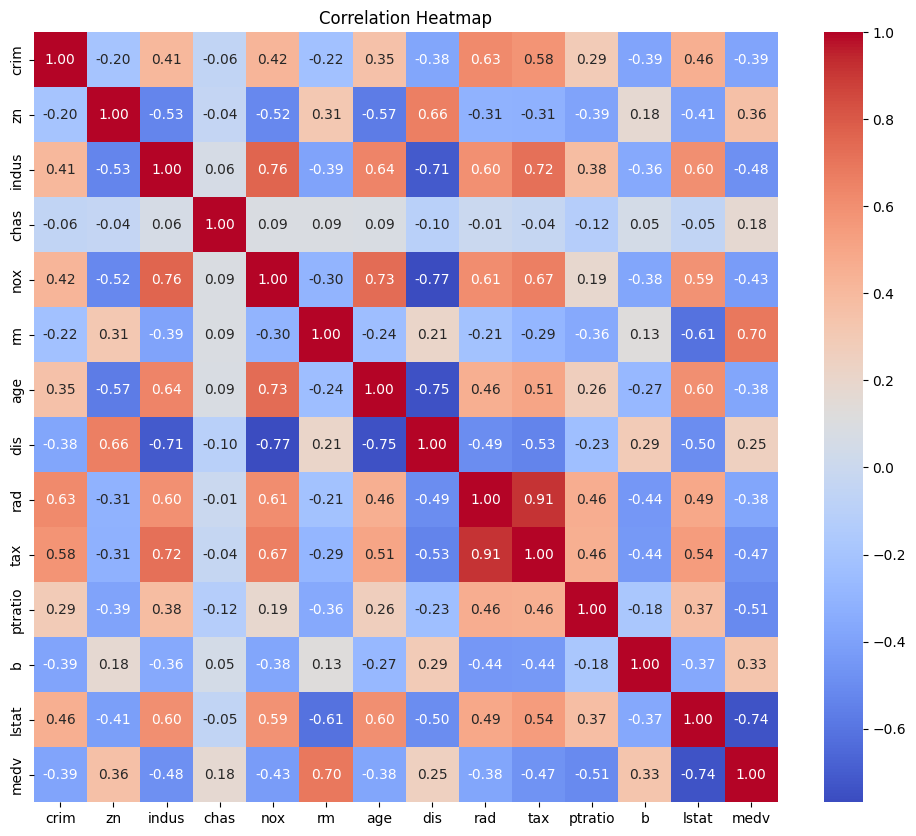

In [218]:
# Correlation matrix
corr_matrix = Boston_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


We have some values which are higly collerated attribute to the target 

##### Factors with the Strongest Correlations to MEDV (House Prices)

LSTAT  with -0.74

RM with +0.70

PTRATIO with -0.51

INDUS with -0.48

TAX with -0.47

NOX with  - 0.43

#### 2. Scatter Plots for Highly Correlated Features

We will plot scatter plots for the features most correlated.
to see how some data are collerated to the target variables.





<Axes: xlabel='rm', ylabel='medv'>

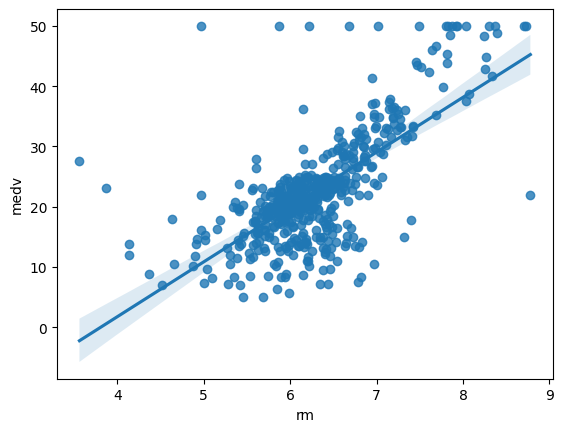

In [226]:
sns.regplot (y= Boston_data['medv'], x = Boston_data['rm'])

<Axes: xlabel='lstat', ylabel='medv'>

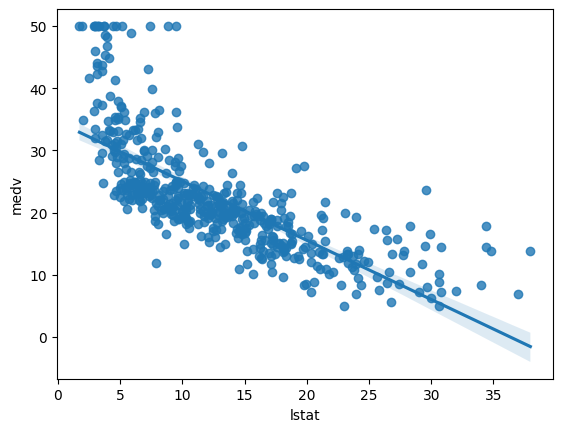

In [227]:
sns.regplot (y= Boston_data['medv'], x = Boston_data['lstat'])

For rm the price increase number of room increases that's why they are positively correlated


For lstat' the price decrease when level is status  decrease that's why they are negatively correlated.

More rooms tend to lead to higher home prices.

Higher percentage of lower-status population correlates with lower home prices.

### Multivariate Analysis

In Multivariate Analysis, we look at how multiple variables interact and their combined effect on the target variable.


#### 1. Pairplot for Key Features

A pairplot gives a quick visual of pairwise relationships between features and the target variable.

This code is using Seaborn, a Python data visualization library, to create a pairplot. A pairplot is a grid of scatterplots and histograms that helps visualize relationships between pairs of variables. aAnd This plot visually exploring the relationships between these features and how they relate to whether the house is near the Charles River (since the 'chas' feature is used as the hue). the one in red are near charles liver but the one in blue are not. This  helps us to identify any potential patterns or trends in the data, such as if the location near the river has an impact on the median house value, number of rooms, or other features.

The pairplot will generate scatterplots for all possible pairs of the selected features ('medv', 'rm', 'lstat', 'crim', 'nox', 'chas'), The diagonal will show the distribution of each individual feature And The scatterplots will be color-coded according to whether the house is near the Charles River or not, based on the 'chas' feature.

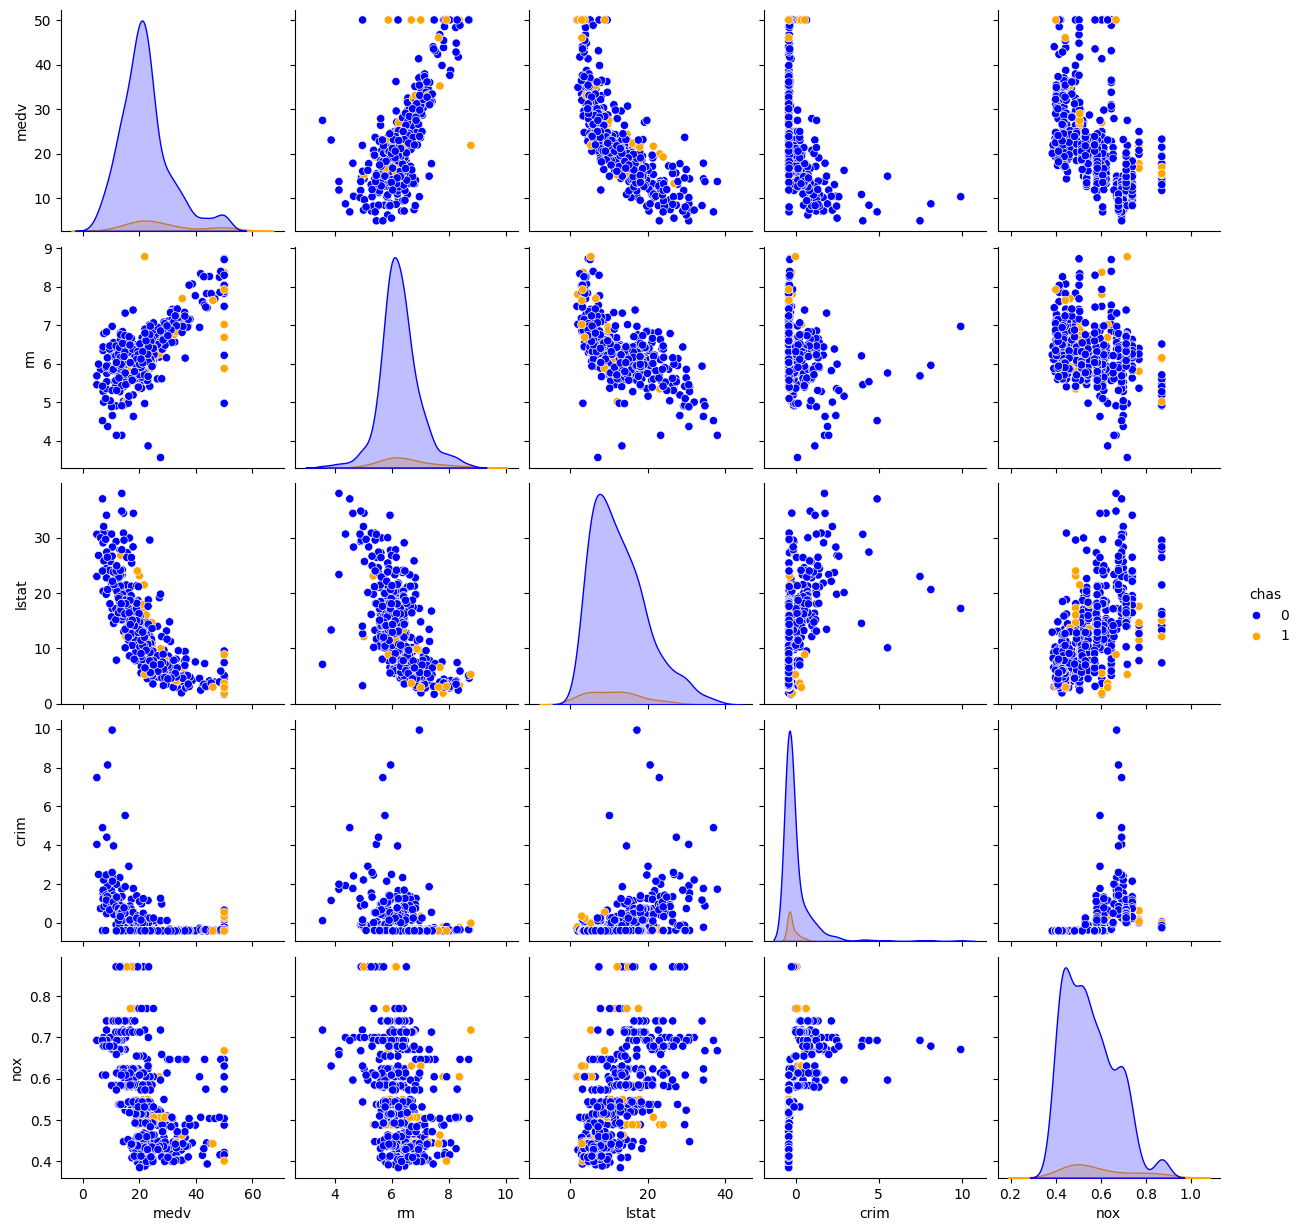

In [228]:
# Pairplot for selected features
#sns.pairplot(Boston_data[['medv', 'rm', 'lstat', 'crim', 'nox']])
# sns.pairplot(Boston_data)
sns.pairplot(Boston_data[['medv', 'rm', 'lstat', 'crim', 'nox', 'chas']], hue="chas", palette=["blue", "orange"])

plt.show()


The plot shows that the number of house near the liver are very few compared to the number which are far from the river.


### Input Split

The code is splitting the Boston_data dataset into two parts: one for the features (independent variables) and one for the target (dependent variable). Here's a breakdown:

In [229]:
x = Boston_data.drop(columns = ['medv', 'rad'] ,axis = 1)
y = Boston_data['medv']
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,-0.666608,15.3,0.441052,4.98
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,-0.987329,17.8,0.441052,9.14
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,-0.987329,17.8,0.396427,4.03
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,-1.106115,18.7,0.416163,2.94
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,-1.106115,18.7,0.441052,5.33


# Model training

## 1. Linear Regression




The code defines a train function that trains a machine learning model, evaluates its performance with various metrics, optionally plots residuals, and can make predictions for new inputs, returning a dictionary of key metrics, including cross-validation score, MSE, MAE, RMSE, R2, coefficients, and intercept.

In [233]:

def train_LinearRegression(model, x, y, test_size=0.2, cv_folds=5, scoring='neg_mean_squared_error', verbose=True, plot_error=True, predict_value=None):
    """
    Trains the given model, evaluates its performance, and optionally plots errors.
    
    Parameters:
        model (object): A machine learning model instance (e.g., LinearRegression, DecisionTreeRegressor).
        x (pd.DataFrame or np.ndarray): Features dataset.
        y (pd.Series or np.ndarray): Target dataset.
        test_size (float): Proportion of the dataset to include in the test split. Default is 0.2.
        cv_folds (int): Number of cross-validation folds. Default is 5.
        scoring (str): Scoring metric for cross-validation. Default is 'neg_mean_squared_error'.
        verbose (bool): If True, prints model performance metrics. Default is True.
        plot_error (bool): If True, generates residual plots. Default is True.
        predict_value (array-like or None): A single value or array of feature values to predict. Default is None.

    Returns:
        dict: A dictionary containing evaluation metrics, coefficients, intercept, cross-validation score, and prediction (if applicable).
    """
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=test_size)

    # Train the model
    model.fit(x_train, y_train)

    # Predict on the testing set
    pred = model.predict(x_test)

    # Perform cross-validation
    cv_scores = cross_val_score(model, x, y, scoring=scoring, cv=cv_folds)
    mean_cv_score = np.abs(np.mean(cv_scores))

    # Compute evaluation metrics
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    # Initialize coefficients and intercept as None
    coefficients = None
    intercept = None

    # Extract coefficients and intercept for linear models
    if hasattr(model, 'coef_') and hasattr(model, 'intercept_'):
        coefficients = model.coef_
        intercept = model.intercept_

    # Compile results into a dictionary
    metrics = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'CV_Score': mean_cv_score,
        'Coefficients': coefficients,
        'Intercept': intercept
    }

    # Print model performance if verbose
    if verbose:
        print("Model Report:")
        for key, value in metrics.items():
            if key in ['Coefficients', 'Intercept']:
                print(f"{key}: {value}")
            else:
                print(f"{key}: {value:.4f}")

    # Predict for the given value, if provided
    prediction = None
    if predict_value is not None:
        prediction = model.predict(np.array(predict_value).reshape(1, -1))  # Ensure the input is 2D
        metrics['Prediction'] = prediction

        # Print prediction result
        print(f"Prediction for the new input {predict_value}: {prediction[0]}")

    # Plot residuals if plot_error is True
    if plot_error:
        residuals = y_test - pred

        # Create the plot
        plt.figure(figsize=(12, 6))

        # Residuals scatterplot
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=pred, y=residuals, color='blue', alpha=0.6)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.title("Residuals vs Predicted")
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")

        # Residuals histogram
        plt.subplot(1, 2, 2)
        sns.histplot(residuals, kde=True, color='blue', alpha=0.5)
        plt.title("Residuals Distribution")
        plt.xlabel("Residuals")
        plt.ylabel("Frequency")

        plt.tight_layout()
        plt.show()

    return metrics


Model Report:
MSE: 26.4709
MAE: 3.3559
RMSE: 5.1450
R2: 0.6390
CV_Score: 35.5814
Coefficients: [-6.99068470e-01  5.14688080e-01 -1.49860929e-02  3.12973863e+00
 -1.55478394e+01  4.72661372e+00 -9.59697735e-03 -1.42851306e+00
  1.62593705e-01 -8.15257437e-01  1.06028721e+00 -4.96644948e-01]
Intercept: 28.75862225912383


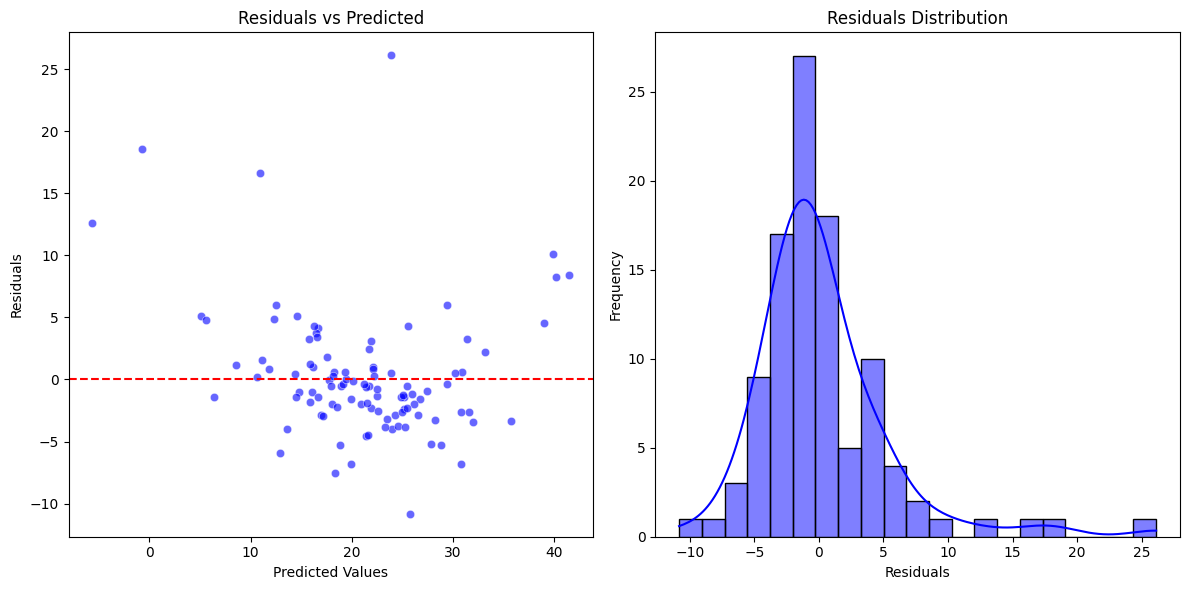

{'MSE': 26.470945619590676,
 'MAE': 3.355907010337581,
 'RMSE': np.float64(5.144992285668724),
 'R2': 0.639034773895141,
 'CV_Score': np.float64(35.58136621076916),
 'Coefficients': array([-6.99068470e-01,  5.14688080e-01, -1.49860929e-02,  3.12973863e+00,
        -1.55478394e+01,  4.72661372e+00, -9.59697735e-03, -1.42851306e+00,
         1.62593705e-01, -8.15257437e-01,  1.06028721e+00, -4.96644948e-01]),
 'Intercept': np.float64(28.75862225912383)}

In [234]:
model = LinearRegression()

train_LinearRegression(model, x, y)

Contains the coefficients of the features in the model. Each value corresponds to the importance or weight of the feature.


The model has a moderate performance with an R² of 0.6390, indicating it explains 64% of the variance, while the MSE, MAE, and RMSE suggest moderate error, and the coefficients reflect the influence of each feature on the target variable.

The model's performance indicates a moderate fit with an R² of 0.639, suggesting it explains 64% of the variance. The MSE (26.47), MAE (3.36), and RMSE (5.14) reflect the average prediction errors, while the CV_Score (35.58) shows the average cross-validation score. The coefficients represent the individual contributions of each feature to the prediction, and the intercept is 28.76, indicating the expected value of the target when all features are zero.


# 2. Decision Tree

In [200]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

print(
    'The shape of the training set:', x_train.shape, 
    '\nThe shape of the testing set:', x_test.shape, 
    '\nThe shape of the training target:', y_train.shape, 
    '\nThe shape of the testing target:', y_test.shape
)


The shape of the training set: (404, 12) 
The shape of the testing set: (102, 12) 
The shape of the training target: (404,) 
The shape of the testing target: (102,)


We splited our dataset into two dataset  80% of the data was allocated for training set and 20% for testing set.
Then the shape shows that The dataset is split into a training set with 404 samples and 12 features, and a testing set with 102 samples and 12 features, with corresponding target arrays of sizes 404 and 102, respectively.

We are going  trains a Decision Tree Regressor on the given training data, evaluates its performance on both training and test sets using MSE and R² metrics, plots the decision tree structure, and returns the trained model.

In [235]:

def train_decision_tree_regression(x_train, x_test,y_train, y_test, max_depth=6, min_samples_split=10):
    """
    Train and evaluate a Decision Tree Regressor and plot the tree.
    
    Parameters:
        x_train (DataFrame or array): Training features.
        y_train (Series or array): Training target.
        x_test (DataFrame or array): Test features.
        y_test (Series or array): Test target.
        max_depth (int): Maximum depth of the tree.
        min_samples_split (int): Minimum samples required to split an internal node.
    
    Returns:
        model: Trained DecisionTreeRegressor model.
    """
    # Initialize the model
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # Evaluation Metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")
    
    # Plot the tree
    plt.figure(figsize=(20, 10))
    plot_tree(model, feature_names=x_train.columns if hasattr(x_train, 'columns') else None,
              filled=True, fontsize=10)
    plt.title("Decision Tree Regression", fontsize=16)
    plt.show()
    
    return model


Training MSE: 6.3223, R²: 0.9272
Test MSE: 17.3471, R²: 0.7635


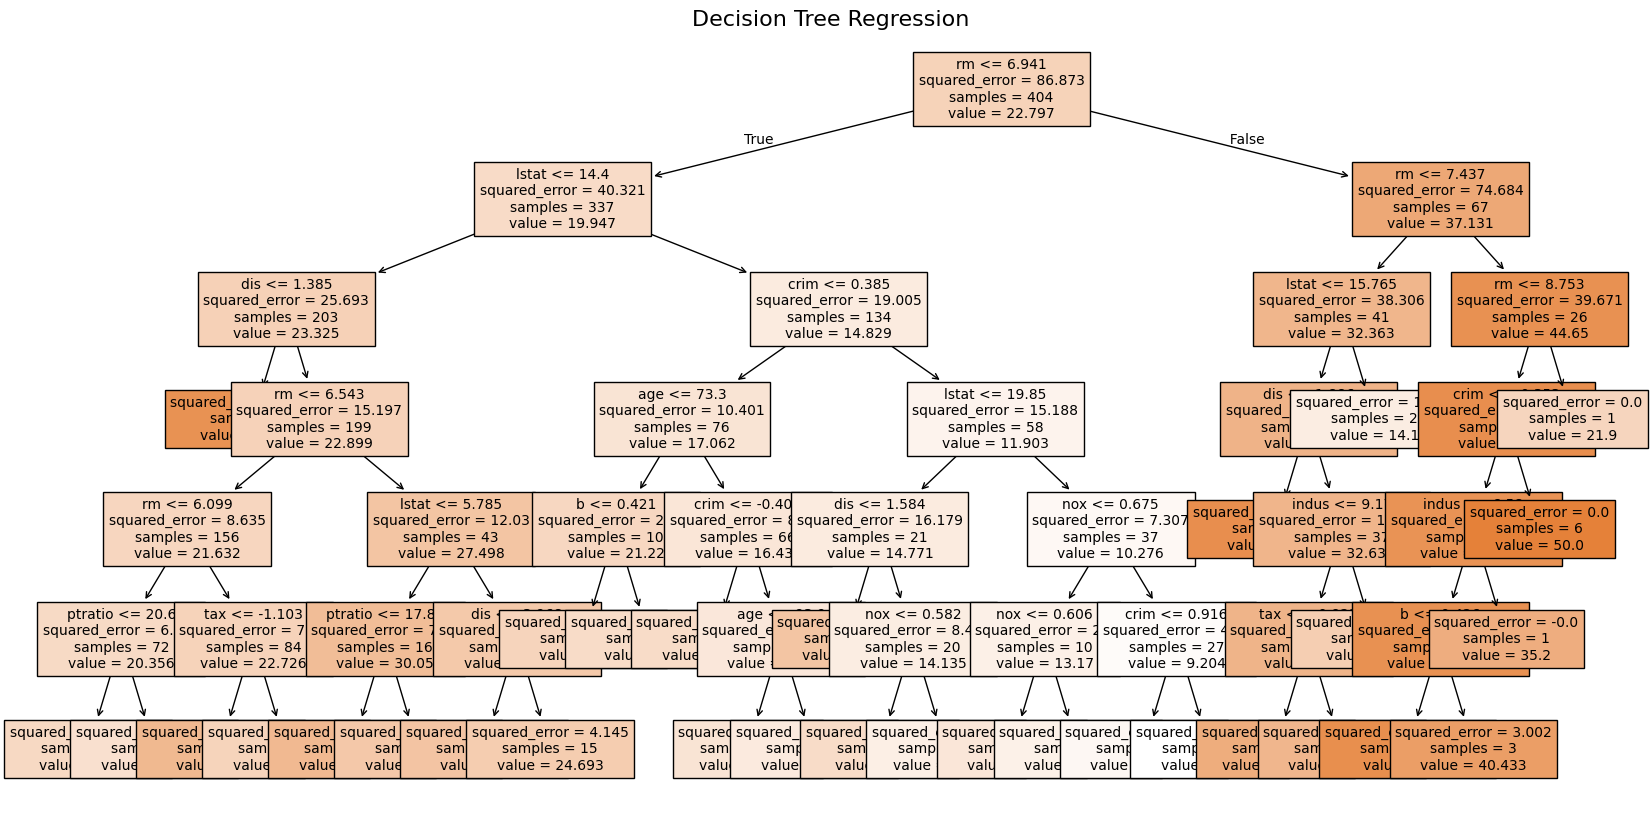

In [236]:
model = train_decision_tree_regression(x_train, x_test,y_train, y_test)


The model fits the training data well (R²: 92.72%) but shows weaker generalization on the test data (R²: 76.35%), suggesting potential overfitting.
so me might need to adjusting hyperparameters like max_depth or min_samples_split or pruning the tree could help improve generalization

## GridSearchCV

This function performs hyperparameter tuning for a Decision Tree Regressor using GridSearchCV, evaluates the model's performance, and returns the best model and its test performance. This function automates hyperparameter optimization and evaluates the best Decision Tree Regressor model's performance on unseen data.

In [179]:


def grid_search_decision_tree(x, y):
    """
    Perform Grid Search CV for a Decision Tree Regressor.
    
    Parameters:
        x_train (DataFrame or array): Training features.
        y_train (Series or array): Training target.
        x_test (DataFrame or array): Test features.
        y_test (Series or array): Test target.
    
    Returns:
        best_model: Best estimator found by GridSearchCV.
    """
    # Define the parameter grid
    param_grid = {
        'max_depth': [2, 5, 10,12, 15, 20, None],
        'min_samples_split': [2,5, 8, 10, 20, 50],
        'min_samples_leaf': [1, 2, 5, 10, 15],
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
    }
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
    # Define the model
    dt_regressor = DecisionTreeRegressor(random_state=42)
    
    # Define the scoring metric
    scoring = make_scorer(mean_squared_error, greater_is_better=False)
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, 
                               scoring=scoring, cv=5, verbose=0, n_jobs=-1)
    
    # Fit the model
    grid_search.fit(x_train, y_train)
    
    # Best model and parameters
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    
    # Evaluate on test data
    y_pred_test = best_model.predict(x_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    print(f"Test MSE: {test_mse:.4f}")
    
    return best_model, grid_search, y_pred_test, test_mse


The grid_search_decision_tree function identifies the best Decision Tree Regressor model (best_model) with optimal hyperparameters, the associated grid search object (grid_search), predictions on the test set (y_pred_test), and the test MSE (n).

The grid search found the best Decision Tree Regressor configuration with criterion='squared_error', max_depth=10, min_samples_leaf=15, and min_samples_split=2, achieving a test Mean Squared Error (MSE) of 17.2652, this indicate the model's predictive accuracy on unseen data.

In [177]:
best_model, grid_search, y_pred_test, n =grid_search_decision_tree(x, y)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
Test MSE: 17.2652


In [163]:
# display the predicted value
y_pred_test

array([26.02      , 29.73333333, 17.1       , 29.73333333, 16.68823529,
       19.87931034, 20.32777778, 17.1       , 21.272     , 21.272     ,
       17.1       , 20.32777778,  9.34285714, 19.87931034, 19.87931034,
       29.6047619 , 17.1       ,  9.34285714, 44.65      , 14.77142857,
       26.02      , 26.02      , 14.52857143, 25.98518519, 14.77142857,
       14.77142857, 26.02      , 14.77142857, 20.32777778, 21.272     ,
       20.32777778, 22.9875    , 29.6047619 , 20.1625    , 14.52857143,
       14.52857143, 35.26      , 19.87931034, 20.32777778, 22.9875    ,
       20.32777778, 25.98518519, 44.65      , 19.87931034, 21.26666667,
       14.77142857, 14.52857143, 22.9875    , 16.68823529, 29.73333333,
       19.87931034, 35.26      , 16.68823529, 25.98518519, 44.65      ,
       19.87931034, 14.52857143, 29.73333333, 19.87931034, 20.32777778,
       25.98518519, 35.26      , 29.73333333, 20.1625    , 29.73333333,
       17.1       , 14.77142857, 21.26666667, 29.73333333, 16.68

The function plot_residuals generates a residual plot for a trained model to evaluate its prediction accuracy.

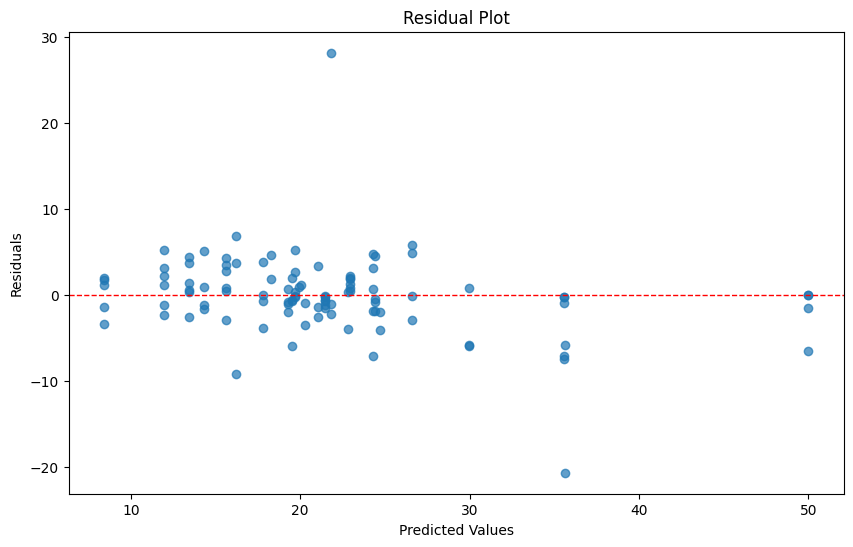

In [154]:
def plot_residuals(model, x_test, y_test):
    """
    Plot residuals for the model's predictions.
    
    Parameters:
        model: The trained DecisionTreeRegressor model.
        x_test: Test feature data.
        y_test: True target values.
    """
    y_pred = model.predict(x_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color="red", linestyle="--", linewidth=1)
    plt.title("Residual Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

# Example Usage
plot_residuals(best_model, x_test, y_test)


The plot shows that the model captures the data well and has no major systematic errors.

The plot_feature_importances function visualizes the relative importance of features in a trained DecisionTreeRegressor model. 
The bar chart displays the features along the x-axis and their corresponding importance scores along the y-axis.Where the features with high importance: Significantly influence the model's decisions and the features with low importance: Contribute less and may be candidates for removal in feature engineering to simplify the model.

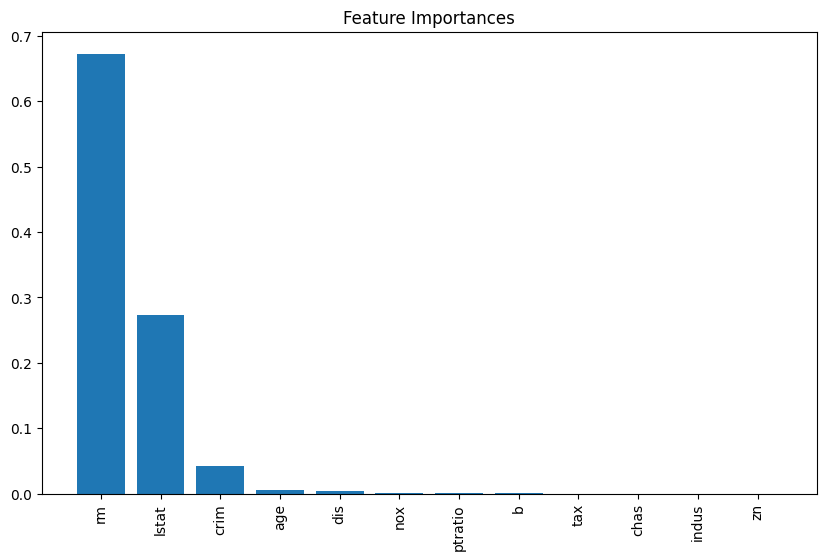

In [237]:
def plot_feature_importances(model, feature_names):
    """
    Plot feature importances of the decision tree.
    
    Parameters:
        model: The trained DecisionTreeRegressor model.
        feature_names (list): List of feature names.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.title("Feature Importances")
    plt.show()

# Example Usage
plot_feature_importances(best_model, feature_names=x_train.columns)


"RM" and "LSTAT" are the most important features, the model relies heavily on them to make predictions. Conversely, 'chas' and 'zn' features with near-zero importance have minimal impact on predictions.
features with High importance is 'rm' and
features with low importance is 'zn'

The plot_best_tree function is designed to visualize the structure of the decision tree for the best-performing DecisionTreeRegressor model after fine-tuning (e.g., using GridSearchCV). 

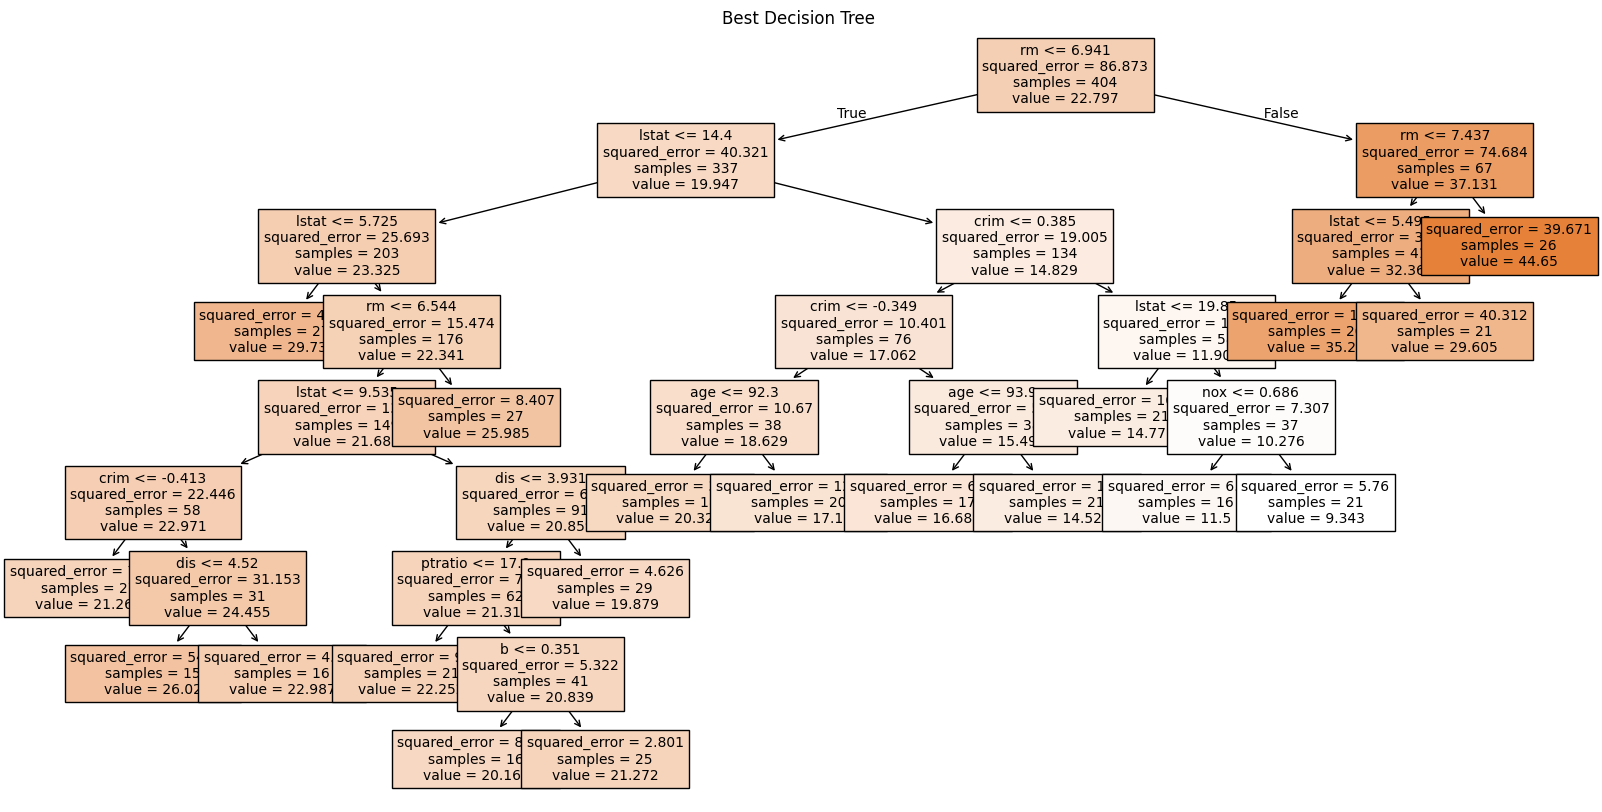

In [238]:
def plot_best_tree(model, feature_names):
    """
    Plot the decision tree for the best model.
    
    Parameters:
        model: The best DecisionTreeRegressor model.
        feature_names (list): List of feature names.
    """
    plt.figure(figsize=(20, 10))
    plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)
    plt.title("Best Decision Tree")
    plt.show()

# Example Usage
plot_best_tree(best_model, feature_names=x_train.columns)


<center>
<h1>CONCLUSION</h1>
</center>

By conclusion MSE for linear Regression is high with the value of 26.4709 while MSE of the Decision Tree Regression with the value of 17.3471 so we can conclude by saying that the best mode for house prediction is Decision tree Regressor because it's error is small.